● Use the data file "challenge1.gwf". The channel name is "H1:CHALLENGE1".

● The data are white, Gaussian noise containing a simulated BBH signal.
1. Load the data into memory. What are the sampling rate and duration of the data?
2. Plot the data in the time-domain.
3. Plot a spectrogram (or q-transform) of the data, and try to identify the signal.
4. What is the time of the merger?

First we install the packages and dowload the data for the task. 

In [ ]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
# -- Click "restart runtime" in the runtime menu

     |████████████████████████████████| 46.2 MB 1.4 MB/s 
     |████████████████████████████████| 51 kB 5.6 MB/s 
     |████████████████████████████████| 1.4 MB 40.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 295 kB 48.8 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 3.6 MB 46.6 MB/s 
     |████████████████████████████████| 1.4 MB 4.4 MB/s 
     |████████████████████████████████| 11.2 MB 39.2 MB/s 
     |████████████████████████████████| 895 kB 37.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 6.7 MB 4.2 MB/s 
     |████████████████

In [ ]:
! pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 7.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.1.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
# -- for gwpy
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")
# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')

--2022-02-13 13:16:06--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf’

challenge1.gwf      100%[===================>]   3.84M  15.0MB/s    in 0.3s    

2022-02-13 13:16:06 (15.0 MB/s) - ‘challenge1.gwf’ saved [4025674/4025674]



In [ ]:
print(gwpy_strain)

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)


To find the sampling rate of the data we can use the command sample_rate for the data.

In [ ]:
samplerate = gwpy_strain.sample_rate
duration = gwpy_strain.duration
# gps = gwpy_strain.t0
print('This is the sampling rate of the data:', samplerate, 'and the duration is: ', duration))


This is the sampling rate of the data: 4096.0 Hz


The data is plotted in the time domain with matplotlib. 

Text(0, 0.5, 'Amplitude')

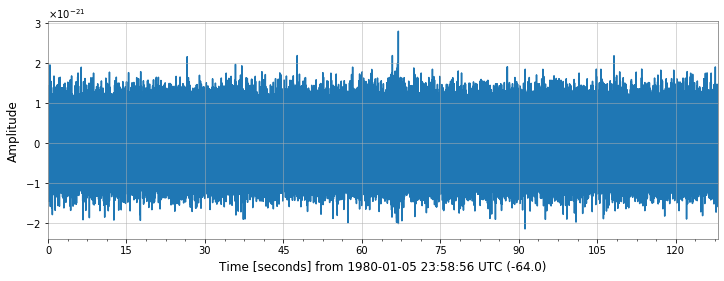

In [ ]:
%matplotlib inline
plot = gwpy_strain.plot()
ax = plot.gca()
ax.set_ylabel('Amplitude')

First a simple spectrogram is plotted.

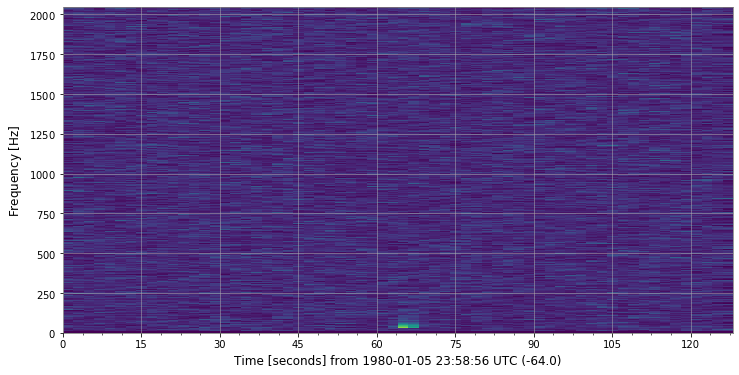

In [ ]:
# plot spectogram
specgram = gwpy_strain.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

To adjust the colour scale of the sprectrogram we can find the minimum and maximum value using specgram.min() or specgram.max().

In [ ]:
# to check for colour scale
print(specgram.min())
print(specgram.max())

2.014597219342668e-29 ct / Hz(1/2)
7.678955173853572e-23 ct / Hz(1/2)


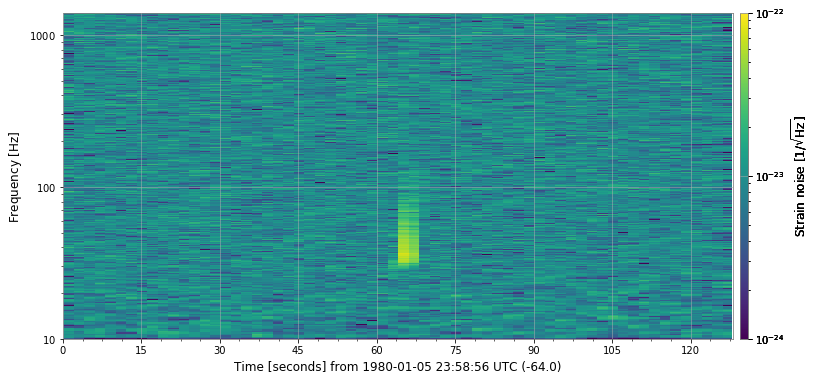

In [ ]:
# adjust colour scale
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-22),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot  # refresh

In the spectrogram we are able to see a signal at around 64 s. To get more information of that signal we will plot a qtransform in the next step.

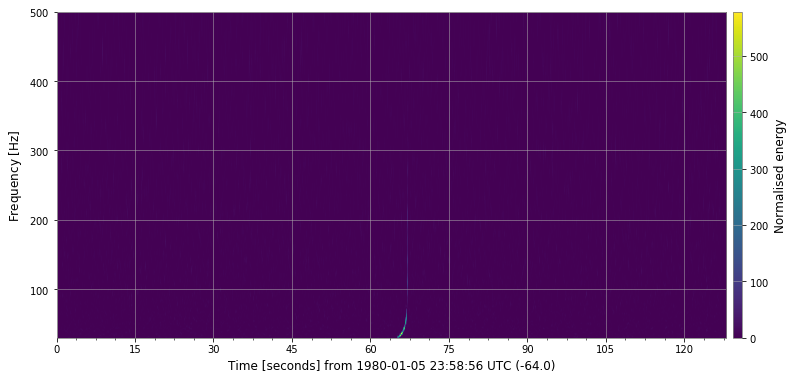

In [ ]:
hq = gwpy_strain.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

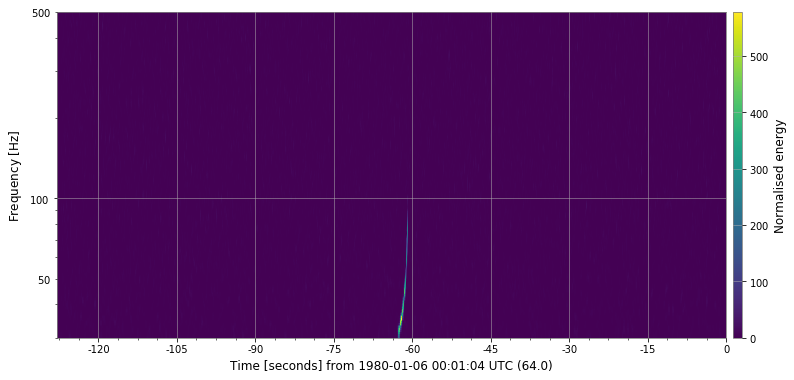

In [ ]:
# better visulisation
ax = plot.gca()
ax.set_epoch(64)
ax.set_ylim(30, 500)
ax.set_yscale("log")
plot 

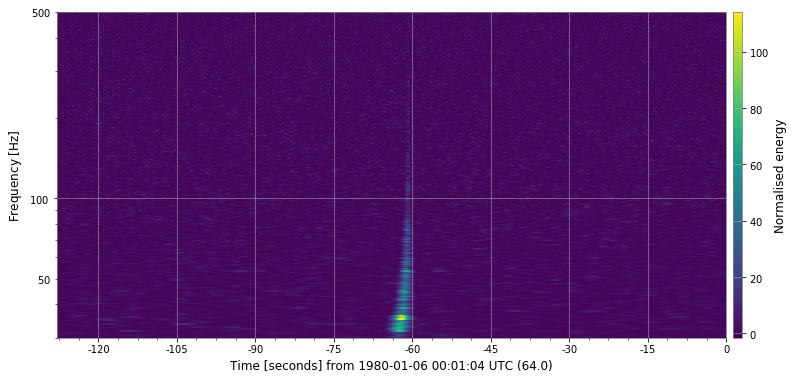

In [ ]:
# we adjust the qrange
hq = gwpy_strain.q_transform(frange=(30, 500), qrange= (400, 410))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(64)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

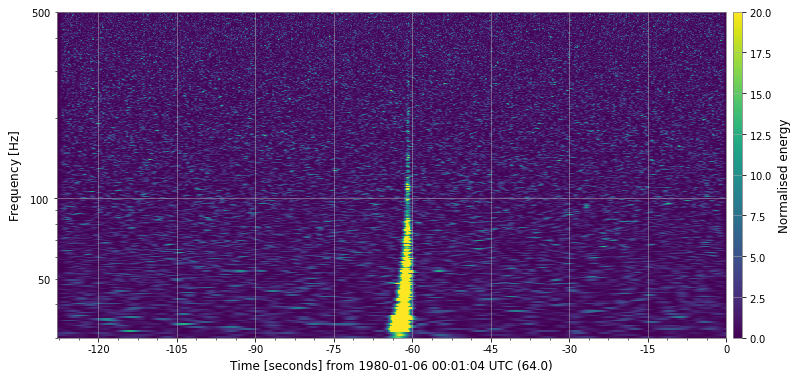

In [ ]:
# adjusting the colour scale
plot.colorbars[0].mappable.set_clim(0,20)
plot.refresh()
plot

Time of the merger can be read of the spectrogram and is at about -64 s.